> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# I: Linear Regression

<div style="text-align: right"> **Due date: Sep. 20, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2020-04-15 22:09:17.379130


## Problem description

Let's estimate an exam score for machine intelligence given two other ones for circuits and data structures. Scores for 1,000 students are available ($\texttt{exam_scores.csv}$). You can use $\texttt{linalg.inv}$, transpose, dot operators provided by $\texttt{Numpy}$ when writing codes.

**I. Score distributions**   
(*3 points*) P1.1 Draw a scatter plot for score distributions (X axis: scores for circuits, Y axis: scores for data structures, Z axis: scores for machine intelligence). You can use '$\texttt{scatter}$' from $\texttt{matplotlib.pyplot}$, and '$\texttt{Axes3D}$' from $\texttt{mpl_toolkits.mplot3d}$. 

**II. Linear regression using gradient descent**   
(*40 points*) P2.1 Implement a linear regression method using **gradient descent** and estimate regression coefficients $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively. 

> a. Learning rate = 0.0001   
> b. Number of iterations = 1,000,000    
> c. Loss function = average RSS (i.e., (1/N)*RSS where N(=1,000) is a total number of samples)   
> d. Initialize all weight values to 0.

(*7 points*) P2.2 Predict the Machine Intelligence score when somebody gets 60 for Circuit and 70 for Data Structure.   
(*3 points*) P2.3 Plot an average RSS over number of iterations.  
(*3 points*) P2.4 Draw a plane using estimated regression coefficients ($w_0$, $w_1$, $w_2$). You can use $\texttt{plot_wireframe}$ and $\texttt{meshgrid}$. 

**III. Linear regression without iterations**      
(*20 points*) P3.1 Implement a linear regression method without iterations (**closed form solution**) and estimate weights $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively. Calculate the mean absolute difference between w from P2.1 and P3.1.    
(*4 points*) P3.2 Draw a plane using estimated regression coefficients and compare it with your plot in P2.3.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

# Solve the Problems (80 points)

## P1.1

In [4]:
from P01 import parse_pd_data, read_csv_using_pandas, plot_data

In [5]:
csv_path = 'exam_scores.csv'
data = read_csv_using_pandas(csv_path)

(1000, 3)
   Circuit  DataStructure  MachineIntelligence
0       48             68                   63
1       62             81                   72
2       79             80                   78
3       76             83                   79
4       59             64                   62


In [6]:
fields = ['Circuit', 'DataStructure', 'MachineIntelligence']
values = parse_pd_data(data, fields)

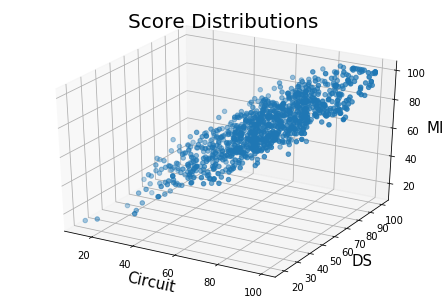

In [7]:
_ = plot_data(values)

## P2.1

In [8]:
from P01 import prepare_dataset_for_linear_regression
from P01 import LinearRegression, plot_average_rss_history

In [9]:
X, y = prepare_dataset_for_linear_regression(values)
X.shape, y.shape

((1000, 3), (1000,))

In [10]:
#set hyperparameters
lr = 0.0001
iterations = 1000000

In [11]:
model = LinearRegression(lr, iterations)

In [12]:
# linear fitting
model.fit(X, y)

In [13]:
print(model.w)

[-1.46196898  0.09600001  0.91049558]


## P2.2

In [14]:
circuit_score = 60
datastructure_score = 70
model.predict(np.array([1, circuit_score, datastructure_score]))

68.03272223991286

## P2.3

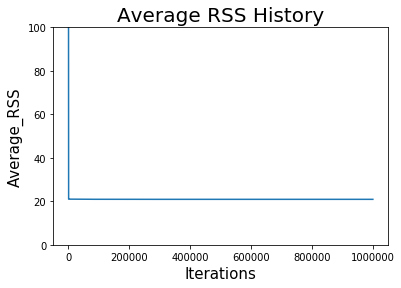

In [15]:
_ = plot_average_rss_history(iterations, model.average_rss_history)

## P2.4

In [16]:
from P01 import plot_data_with_wireframe
%matplotlib notebook
# %matplotlib inline

<IPython.core.display.Javascript object>


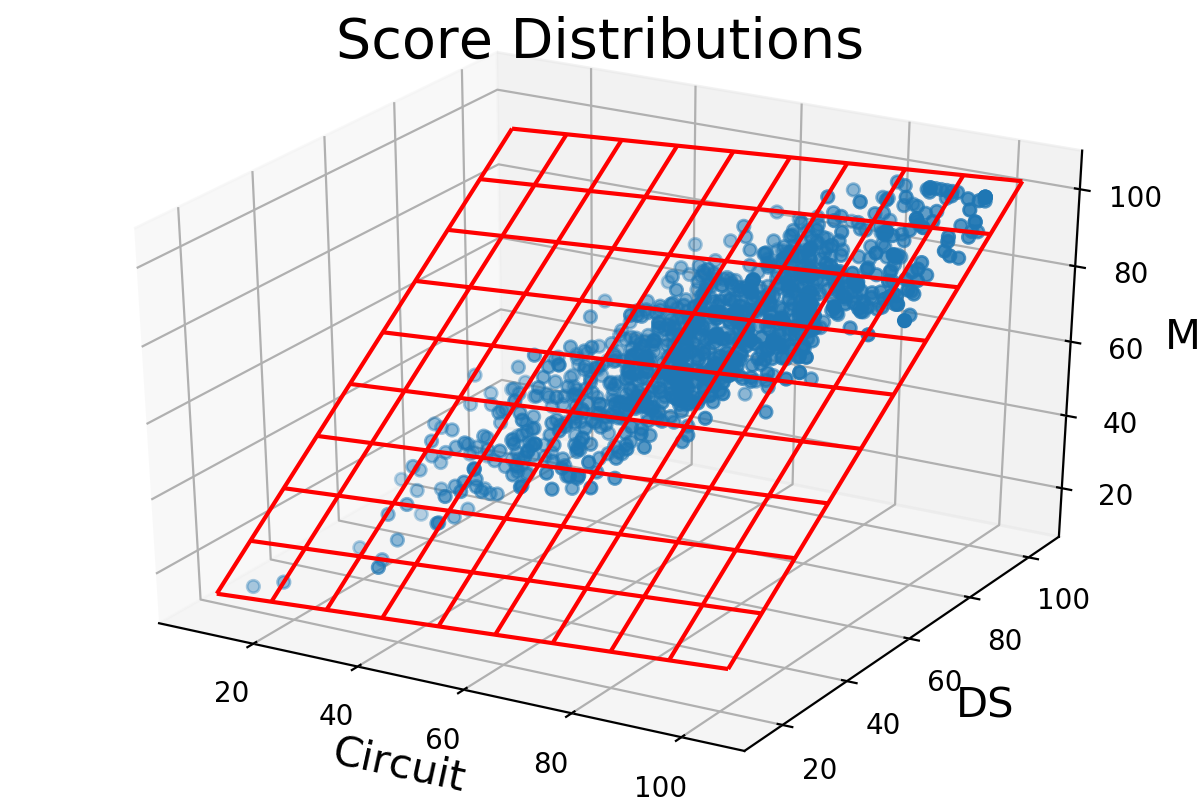

In [17]:
_ = plot_data_with_wireframe(values, model.w, 'red')

## P3.1

In [18]:
from P01 import get_closed_form_solution

In [19]:
w_closed = get_closed_form_solution(X, y)

In [20]:
print(w_closed)

[-1.46243738  0.09600221  0.91049989]


In [21]:
np.mean(np.abs(model.w - w_closed))

0.00015830635198341159

## P3.2

<IPython.core.display.Javascript object>


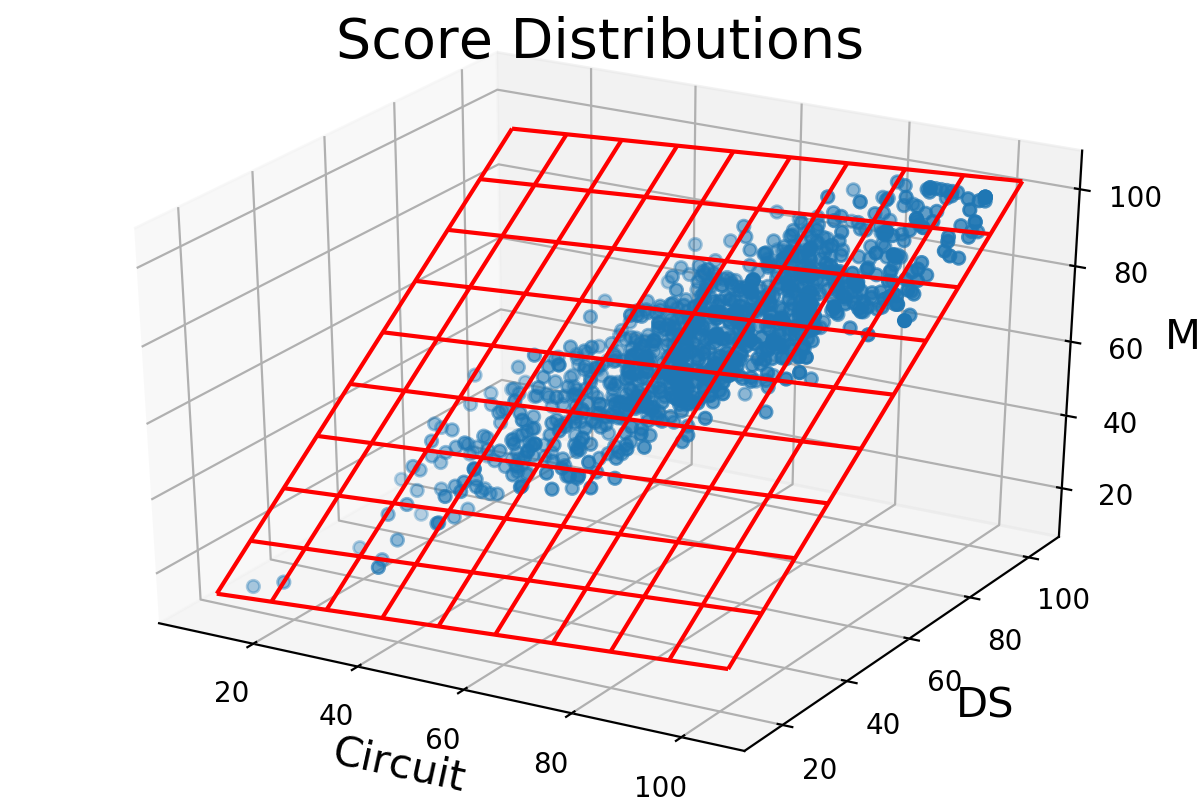

In [22]:
_ = plot_data_with_wireframe(values, model.w, 'red')

<IPython.core.display.Javascript object>


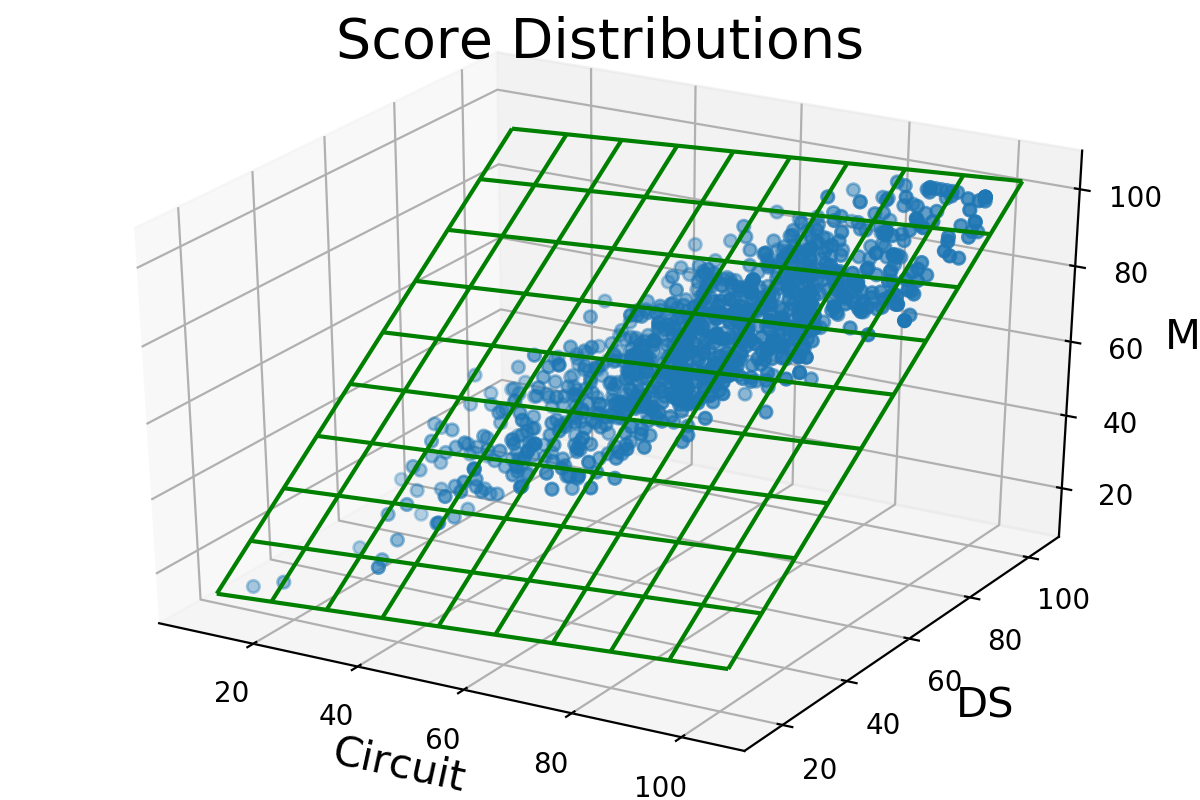

In [23]:
_ = plot_data_with_wireframe(values, w_closed, 'green')